In [10]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/MyDrive/Colab Notebooks/"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'ACP Prod Final.ipynb'			   GPT1.ipynb
 AWARE					   GPT2.ipynb
'AWARE '				  'GPT Embedding.ipynb'
'AWARE ACP'				  'kfold bert acp.ipynb'
'AWARE ACP Social-checkpoint.ipynb'	  'lime: explain any model.ipynb'
'AWARE ACP Social.ipynb'		   main.ipynb
 bloom_urdu.ipynb			   Untitled0.ipynb
'Copy of text_classification_shap.ipynb'   Untitled2.ipynb
'EDA (1).ipynb'				   Untitled3.ipynb
 EDA.ipynb


In [11]:
!mkdir -p "/content/drive/MyDrive/Colab Notebooks/AWARE/"


In [12]:
from google.colab import drive
import os
drive.mount('/content/drive')
path_to_file = '/content/drive/MyDrive/Colab Notebooks/AWARE/'
os.chdir(path_to_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os
path_to_file = '/content/drive/MyDrive/Colab Notebooks/AWARE/'
os.chdir(path_to_file)
print("Current Directory:", os.getcwd())


Current Directory: /content/drive/MyDrive/Colab Notebooks/AWARE


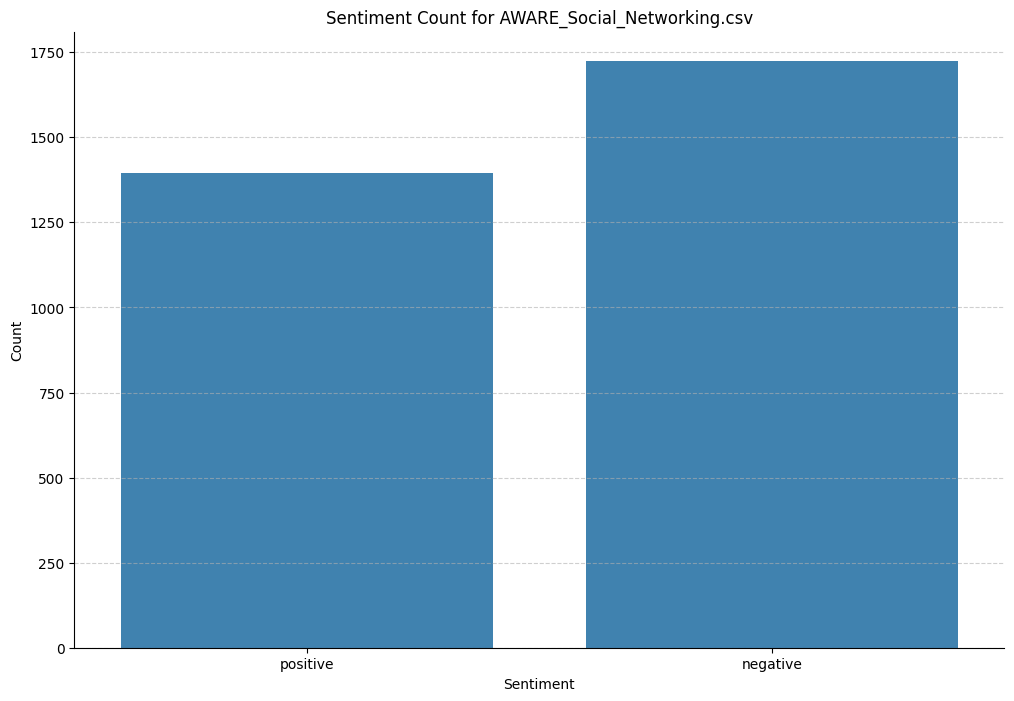

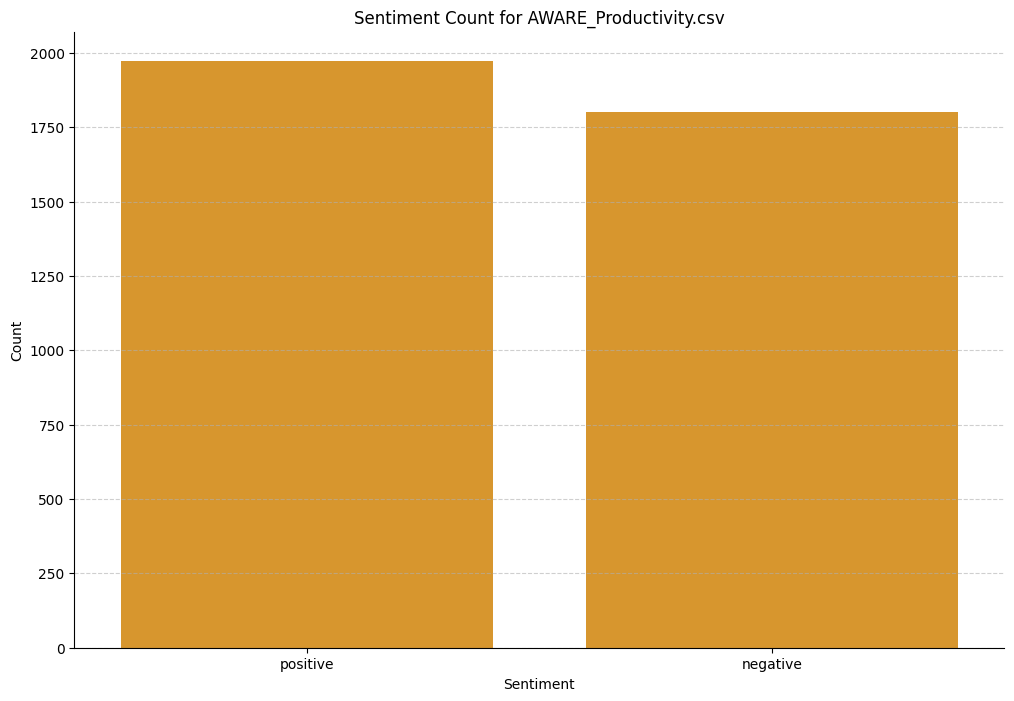

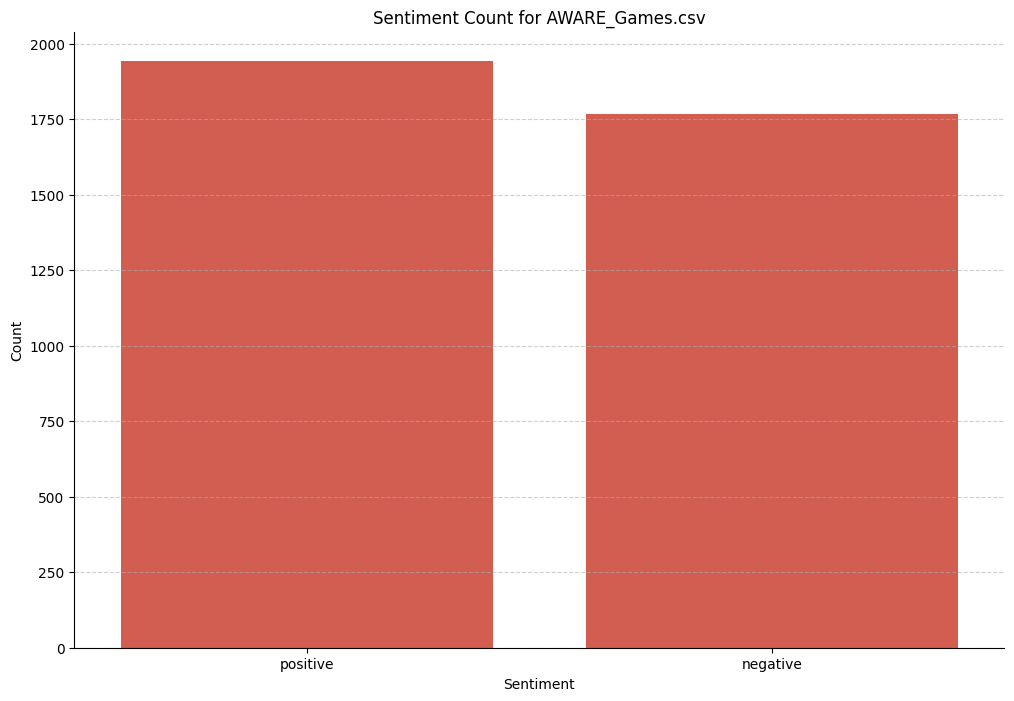

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of your CSV files
csv_files = ['AWARE_Social_Networking.csv', 'AWARE_Productivity.csv', 'AWARE_Games.csv']

# Custom color palettes for each dataset
custom_palettes = [
    ['#2E86C1', '#FF5733'],  # Custom colors for the first dataset
    ['#F39C12', '#6F3E23'],  # Custom colors for the second dataset
    ['#E74C3C', '#C23616']  # Custom colors for the third dataset
]

# Iterate through the CSV files and plot sentiment counts for each dataset
for i, csv_file in enumerate(csv_files):
    data = pd.read_csv(csv_file)
    data = data[data['sentiment'] != 'no']  # Filter out rows with sentiment 'no'

    plt.figure(figsize=(12, 8))
    sns.set_palette(custom_palettes[i])  # Set the custom color palette for the current dataset
    sns.countplot(data=data, x='sentiment', order=['positive', 'negative'])
    plt.title(f"Sentiment Count for {csv_file}")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    sns.despine()  # Remove top and right spines for a cleaner look
    plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add grid lines
    plt.show()


In [15]:
import pandas as pd

# List of your CSV files
csv_files = ['AWARE_Social_Networking.csv', 'AWARE_Productivity.csv', 'AWARE_Games.csv']

# Dictionary to store total samples for each domain
domain_sample_counts = {}

# Iterate through the CSV files and calculate total samples
total_samples = 0
for csv_file in csv_files:
    data = pd.read_csv(csv_file)
    domain_name = csv_file.split('.')[0]  # Use the file name without extension as the domain name
    domain_sample_counts[domain_name] = len(data)  # Store the number of samples for this domain
    total_samples += len(data)  # Add to the total samples

# Print the total number of samples for each domain
print("Total samples for each domain:")
for domain, count in domain_sample_counts.items():
    print(f"{domain}: {count}")

# Print the total number of samples across all domains
print(f"\nTotal samples across all domains: {total_samples}")


Total samples for each domain:
AWARE_Social_Networking: 3118
AWARE_Productivity: 3774
AWARE_Games: 3709

Total samples across all domains: 10601


In [16]:
import pandas as pd

# List of your CSV files
csv_files = ['AWARE_Social_Networking.csv', 'AWARE_Productivity.csv', 'AWARE_Games.csv']

# Dictionary to store total samples for each domain before and after filtering
domain_sample_counts = {"before_filtering": {}, "after_filtering": {}}

# Iterate through the CSV files and calculate total samples before and after filtering
total_samples_before_filtering = 0
total_samples_after_filtering = 0

for csv_file in csv_files:
    # Read the dataset
    data = pd.read_csv(csv_file)

    # Total samples before filtering
    domain_name = csv_file.split('.')[0]  # Use the file name without extension as the domain name
    domain_sample_counts["before_filtering"][domain_name] = len(data)
    total_samples_before_filtering += len(data)

    # Filter out rows with sentiment 'no'
    filtered_data = data[data['sentiment'] != 'no']
    domain_sample_counts["after_filtering"][domain_name] = len(filtered_data)
    total_samples_after_filtering += len(filtered_data)

# Print the results
print("Total samples for each domain (before and after filtering):")
for domain in csv_files:
    domain_name = domain.split('.')[0]
    print(f"{domain_name}:")
    print(f"  Before filtering: {domain_sample_counts['before_filtering'][domain_name]}")
    print(f"  After filtering: {domain_sample_counts['after_filtering'][domain_name]}")

# Print the total number of samples across all domains
print(f"\nTotal samples across all domains (before filtering): {total_samples_before_filtering}")
print(f"Total samples across all domains (after filtering): {total_samples_after_filtering}")


Total samples for each domain (before and after filtering):
AWARE_Social_Networking:
  Before filtering: 3118
  After filtering: 3118
AWARE_Productivity:
  Before filtering: 3774
  After filtering: 3774
AWARE_Games:
  Before filtering: 3709
  After filtering: 3709

Total samples across all domains (before filtering): 10601
Total samples across all domains (after filtering): 10601


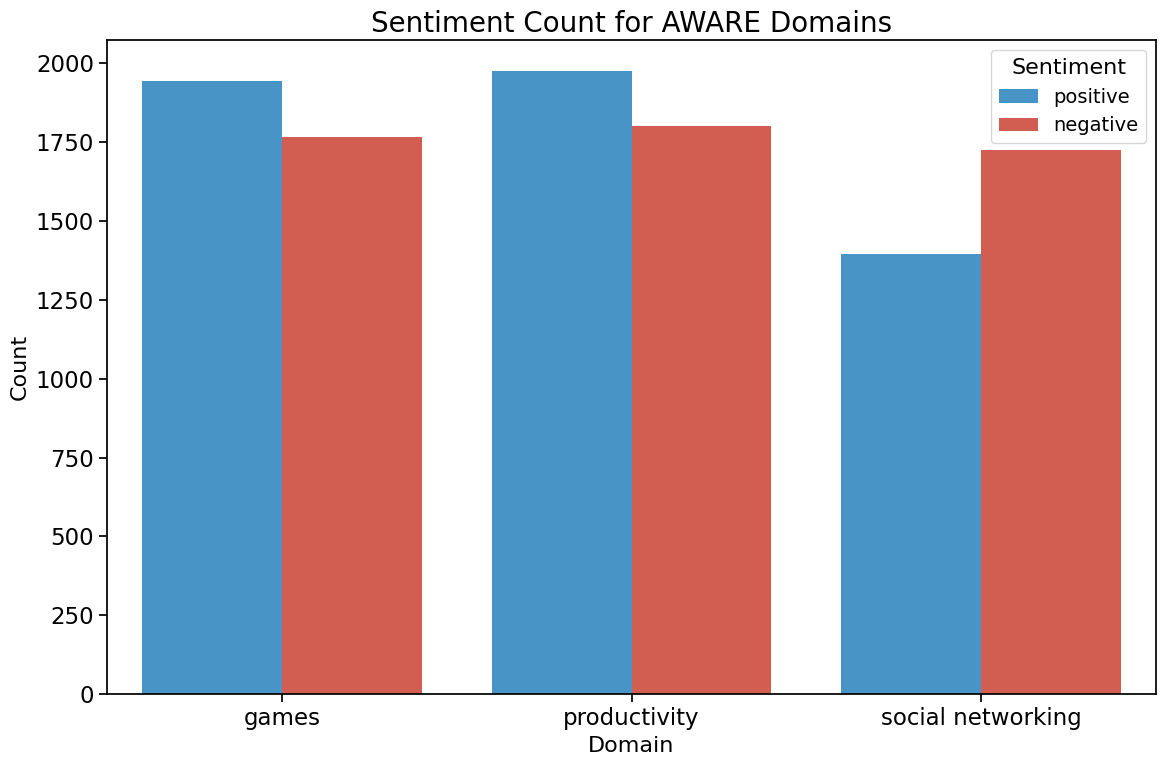

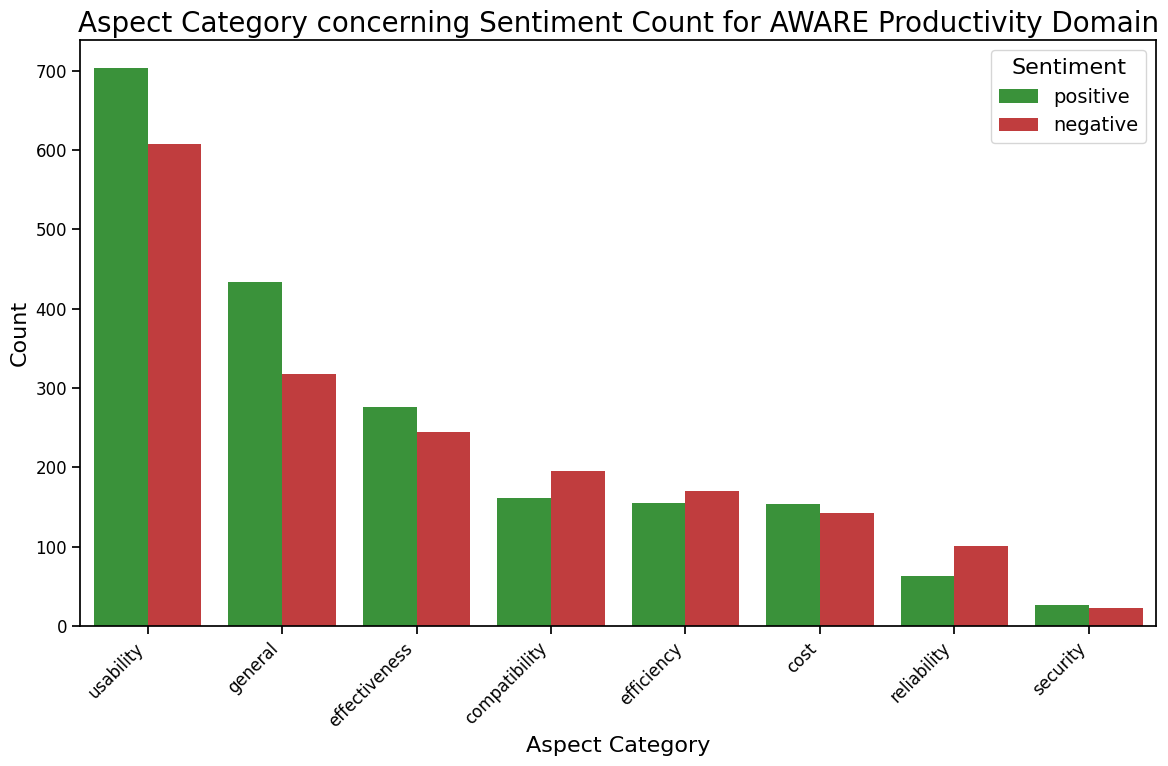

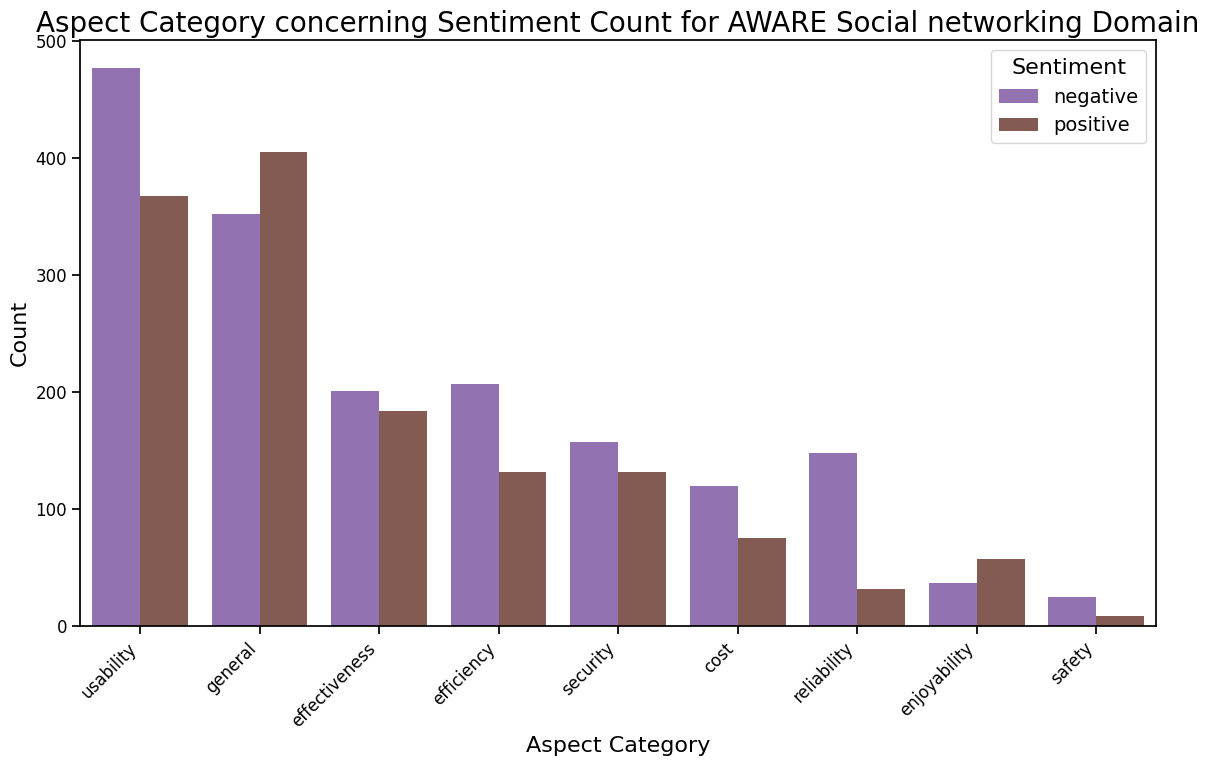

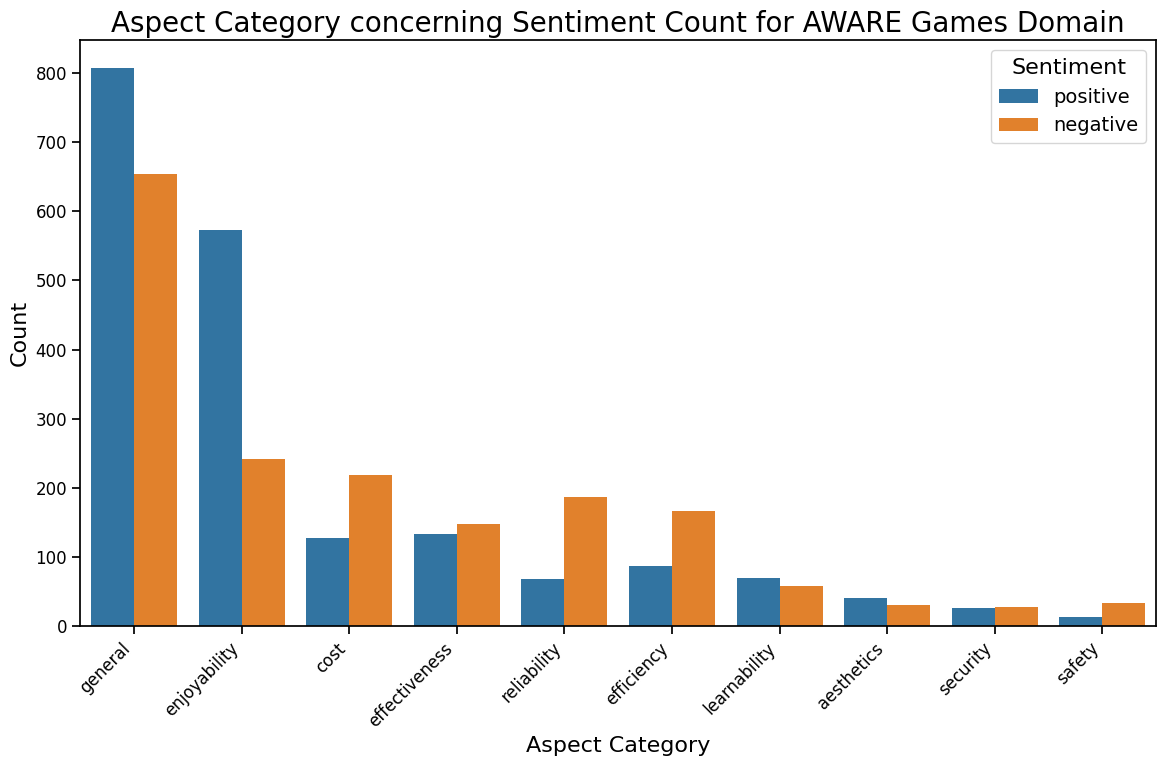

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the AWARE_Comprehensive.csv file
comprehensive_csv = 'AWARE_Comprehensive.csv'  # Update with the correct file path
data = pd.read_csv(comprehensive_csv)

# Define custom color palettes for each domain
domain_palettes = {
    'games': ['#1f77b4', '#ff7f0e'],  # Blue and Orange for Games
    'productivity': ['#2ca02c', '#d62728'],  # Green and Red for Productivity
    'social networking': ['#9467bd', '#8c564b']  # Purple and Brown for Social Networking
}

# Set global font scale for larger text
sns.set_context("notebook", font_scale=1.5)

# Overall sentiment count for AWARE domains (Figure 2a)
plt.figure(figsize=(12, 8))
sns.set_palette(['#3498db', '#e74c3c'])  # Blue for positive, Red for negative
sns.countplot(data=data, x='domain', hue='sentiment', order=data['domain'].value_counts().index)
plt.title("Sentiment Count for AWARE Domains", fontsize=20)
plt.xlabel("Domain", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.legend(title="Sentiment", fontsize=14, title_fontsize=16)
plt.tight_layout()
plt.savefig("overall_sentiment_count_domains.png")  # Save the plot
plt.show()

# Plot for each domain: Sentiment count by Aspect Category (Figures 2b, 2c, 2d)
domains = data['domain'].unique()

for domain in domains:
    domain_data = data[data['domain'] == domain]
    plt.figure(figsize=(12, 8))
    sns.set_palette(domain_palettes[domain.lower()])  # Set the color palette for the specific domain
    sns.countplot(data=domain_data, x='category', hue='sentiment',
                  order=domain_data['category'].value_counts().index)
    plt.title(f"Aspect Category concerning Sentiment Count for AWARE {domain.capitalize()} Domain", fontsize=20)
    plt.xlabel("Aspect Category", fontsize=16)
    plt.ylabel("Count", fontsize=16)
    plt.legend(title="Sentiment", fontsize=14, title_fontsize=16)
    plt.xticks(rotation=45, fontsize=12, ha='right')  # Rotate x-axis labels for better visibility
    plt.yticks(fontsize=12)  # Increase font size of y-axis ticks
    plt.tight_layout()
    plt.savefig(f"{domain.lower()}_aspect_sentiment_count.png")  # Save the plot with the domain name
    plt.show()


In [21]:
import pandas as pd

# Load the AWARE_Comprehensive.csv file
comprehensive_csv = 'AWARE_Comprehensive.csv'  # Replace with the correct file path
data = pd.read_csv(comprehensive_csv)

# Count total samples
total_samples = len(data)

# Count samples per domain
domain_counts = data['domain'].value_counts()

# Prepare a summary table
summary_table = pd.DataFrame({
    'Domain': domain_counts.index,
    'Samples': domain_counts.values
})

# Add a row for total samples
summary_table.loc[len(summary_table.index)] = ['Total', total_samples]

# Save the summary table to an Excel file
output_excel_file = 'AWARE_Domain_Sample_Summary.xlsx'
summary_table.to_excel(output_excel_file, index=False)

# Print the summary table
print("Summary Table:")
print(summary_table)

# Optional: Show success message
print(f"\nThe summary table has been saved to '{output_excel_file}'.")


Summary Table:
              Domain  Samples
0              games     4080
1       productivity     3846
2  social networking     3395
3              Total    11321

The summary table has been saved to 'AWARE_Domain_Sample_Summary.xlsx'.
